In [1]:
data = r"C:\Code\Next-Gen-Pockels-Control\TEST_DATA\pariposer_IV.csv"

import pandas as pd
from matplotlib import pyplot as plt

df_pariposer = pd.read_csv(data, sep=',', header=0, skiprows=8)

print(df.columns)

fig, ax = plt.subplots()
df_pariposer.plot(x='Value', y='Reading', style='-o', label='Pariposer', markersize=2, linewidth=0.7, ax=ax)
# df.plot(x='Value', y='Reading', style='-', label='Pariposer', ax=ax)
# df.plot(x='Value', y='Reading', style='o', label='Pariposer raw', markersize=2, ax=ax)

plt.grid(True, alpha=0.5)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Code\\Next-Gen-Pockels-Control\\TEST_DATA\\pariposer_IV.csv'

<class 'numpy.ndarray'>
(69,)
        Current     Voltage       Time
0  2.061995e-11   -0.017212   0.000000
1  1.832717e-09   49.996950   5.446739
2  2.574680e-09   99.992800  10.893440
3  3.214183e-09  150.002300  16.340170
4  3.711619e-09  199.994800  21.786900


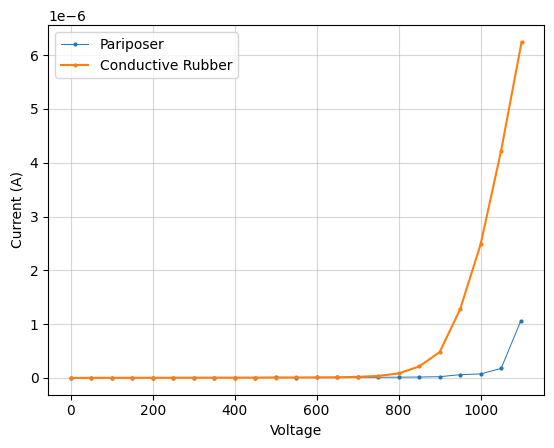

In [ ]:
import numpy as np

cr_data_txtfile = r"C:\Code\Next-Gen-Pockels-Control\TEST_DATA\conductive_rubber_50Vsteps.txt"
cr_data = np.loadtxt(cr_data_txtfile, delimiter=',')
print(type(cr_data))
print(cr_data.shape)
# filter for every 3rd element
current_reading = cr_data[::3]
voltage_source = cr_data[1::3]
relative_time = cr_data[2::3]
# create a new dataframe
df_cr = pd.DataFrame({'Current': -current_reading, 'Voltage': -voltage_source, 'Time': relative_time})

pari_data_txtfile = r"C:\Code\Next-Gen-Pockels-Control\TEST_DATA\pariposer_50V-steps_5s-delay.txt"
pari_data = np.loadtxt(pari_data_txtfile, delimiter=',')
current_reading = pari_data[::3]
voltage_source = pari_data[1::3]
relative_time = pari_data[2::3]
# create a new dataframe
df_pari = pd.DataFrame({'Current': -current_reading, 'Voltage': -voltage_source, 'Time': relative_time})

print(df_pari.head()) 

fig, ax = plt.subplots()
# ax.set_yscale('log')
logy_option = False
df_pari.plot(x='Voltage', y='Current', style='-o', label='Pariposer', markersize=2, linewidth=0.7, ax=ax, logy=logy_option)
df_cr.plot(x='Voltage', y='Current', style='-o', label='Conductive Rubber', markersize=2, ax=ax, logy=logy_option)
# ax.set_yscale('log')
plt.grid(True, alpha=0.5)
plt.ylabel('Current (A)')

if logy_option:
    plt.ylabel('Current (A) - log scale')

plt.grid(True, alpha=0.5)



# New I-T data by Owen

In [2]:
import os
import pandas as pd
# "C:\Code\Pockels-Gen2-Control\TEST_DATA\I-t Data\dev\I-t_dev_2025-02-21_21.csv"
folder_path = r"C:\Code\Pockels-Gen2-Control"
# relative_path = r"TEST_DATA\I-t Data\xmed\I-t_xmed_2025-02-21_1.csv"
relative_path = r"TEST_DATA\I-t Data\dev\I-t_dev_2025-02-21_21.csv"
file_path = os.path.join(folder_path, relative_path)


# Read the CSV file while skipping metadata lines
df = pd.read_csv(file_path, skiprows=8)

# Display the first few rows to confirm the structure
# df.head()


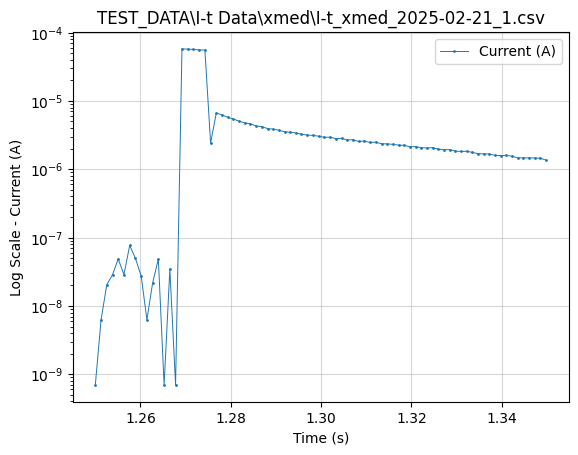

In [7]:
import matplotlib.pyplot as plt
import os
import pandas as pd

# "C:\Code\Pockels-Gen2-Control\TEST_DATA\I-t Data\dev\I-t_dev_2025-02-21_21.csv"
folder_path = r"C:\Code\Pockels-Gen2-Control"
relative_path = r"TEST_DATA\I-t Data\xmed\I-t_xmed_2025-02-21_1.csv"
# relative_path = r"TEST_DATA\I-t Data\dev\I-t_dev_2025-02-21_20.csv"
file_path = os.path.join(folder_path, relative_path)
df = pd.read_csv(file_path, skiprows=8)

time_range = [1.25, 1.35]
# time_range = [1.27, 1.28]

# Filter data for time range
df = df[(df['Time (s)'] >= time_range[0]) & (df['Time (s)'] <= time_range[1])]

# Create figure and axis
fig, ax = plt.subplots()

# Make y-axis log scale
ax.set_yscale('log')

# Plot current vs time
df.plot(x='Time (s)', y='Current (A)', style='-', marker='.', markersize=2, linewidth=0.7, ax=ax)

# Customize the plot
ax.set_xlabel('Time (s)')
ax.set_ylabel('Log Scale - Current (A)')
ax.set_title(f'{relative_path}')
ax.grid(True, alpha=0.5)

plt.show()


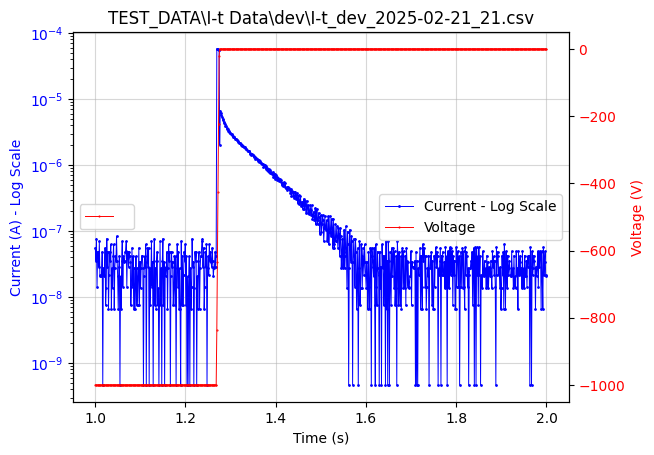

In [26]:

folder_path = r"C:\Code\Pockels-Gen2-Control"
relative_path = r"TEST_DATA\I-t Data\dev\I-t_dev_2025-02-21_21.csv"
file_path = os.path.join(folder_path, relative_path)
df = pd.read_csv(file_path, skiprows=8)

time_range = [1, 2]
# time_range = [0, 0.02]
# Filter data for time range
df = df[(df['Time (s)'] >= time_range[0]) & (df['Time (s)'] <= time_range[1])]
# Create figure and axis objects with a single subplot
fig, ax1 = plt.subplots()

# Plot current vs time on the first y-axis
line1 = df.plot(x='Time (s)', y='Current (A)', style='-', marker='.', 
                markersize=2, linewidth=0.7, ax=ax1, color='blue', 
                label='Current - Log Scale')
ax1.set_yscale('log')
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Convert voltage to absolute voltage
df['Absolute Voltage (V)'] = abs(df['Voltage (V)'])

# Plot absolute voltage vs time on the second y-axis
line2 = df.plot(x='Time (s)', y='Voltage (V)', style='-', marker='.', 
                markersize=1, linewidth=0.7, ax=ax2, color='red',
                label='Voltage')

# ax2.set_yscale('log')
# Customize the plot
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Current (A) - Log Scale', color='blue')
ax2.set_ylabel('Voltage (V)', color='red')
ax1.set_title(f'{relative_path}')
ax1.grid(True, alpha=0.5)

# Color the tick labels to match the respective lines
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')
ax2.legend(" ", loc='center left')

plt.show()


In [ ]:


# Create figure and axis objects with a single subplot
fig, ax1 = plt.subplots()

# Plot current vs time on the first y-axis
line1 = df.plot(x='Time (s)', y='Current (A)', style='-', marker='.', 
                markersize=2, linewidth=0.7, ax=ax1, color='blue', 
                label='Current')
ax1.set_yscale('log')
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot voltage vs time on the second y-axis
line2 = df.plot(x='Time (s)', y='Voltage (V)', style='-', marker='.', 
                markersize=2, linewidth=0.7, ax=ax2, color='red',
                label='Voltage')

ax2.set_yscale('log')
# Customize the plot
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Log Scale - Current (A)', color='blue')
ax2.set_ylabel('Voltage (V)', color='red')
ax1.set_title(f'{relative_path}')
ax1.grid(True, alpha=0.5)

# Color the tick labels to match the respective lines
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
ax2.legend(" ",loc='center right')

plt.show()